# HDDT Locations #

## An analysis of the locations associated with members of the CEDA 1830 -1870 ##

<img src="locationsdemo.png">

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community #This part of networkx, for community detection, needs to be imported separately.
import nbconvert
import csv

In [34]:
location = pd.read_csv ('location_202107221303.csv')
names = pd.read_csv ('vw_3_location_names_1_2_202107221500.csv')
tuples = pd.read_csv ('vw_2_location_membership_xid_202107221527.csv')

with open('vw_3_location_names_1_2_202107221500.csv', 'r') as nodecsv: # Open the Nodes csv file
    nodereader = csv.reader(nodecsv) # Read the csv
    nodes = [n for n in nodereader][1:]# Retrieve the data (using Python list comprhension and list slicing
                                       # to remove the header row
    node_names = [n[0] for n in nodes] # Get a list of only the node names

with open('vw_2_location_membership_xid_202107221527.csv', 'r') as edgecsv: # Open the file
    edgereader = csv.reader(edgecsv) # Read the csv
    edge_list = list(edgereader) # Convert to list, so can iterate below in for loop
    
    # Create empty arrays to store edge data and edge attribute data
    edges = []
    edges_attributes = []
    
    # Fill the arrays with data from CSV
    for e in edge_list[1:]:
        edges.append(tuple(e[0:2])) # Get the first 2 columns (source, target) and add to array
        # not used this time. edges_attributes.append(tuple(e[2:4])) # Get the 3rd and 4th columns (first_year, last_year) and add to array
    
edge_names = [e[0] for e in edges] # Get a list of only the edge names   

In [35]:
location

,id,name,notes
0,1,London,NaN
1,3,country,NaN
2,4,Africa,NaN
3,5,America,NaN
4,6,Scotland,NaN
...,...,...,...
78,80,Madagascar,NaN
79,81,Ecuador,NaN
80,82,Seychelles,NaN
81,83,Panama,NaN


In [36]:
names

,Name
0,A Mackintosh Shaw
1,"A , jun Ramsay"
2,A A Stewart
3,A B Stark
4,A C Brebner
...,...
1876,x Tumangung of Jehore
1877,x University Library
1878,x Wagstaff
1879,x Wienecke


In [37]:
tuples

,Source,Target
0,Arthur William A Beckett,London
1,Andrew Mercer Adam,country
2,H R Adam,Africa
3,Henry John Adams,London
4,William (2) Adams,London
...,...,...
2056,James A Youl,London
2057,Robert Younge,country
2058,Arthur de Zeltner,Panama
2059,x Zohrab,Armenia


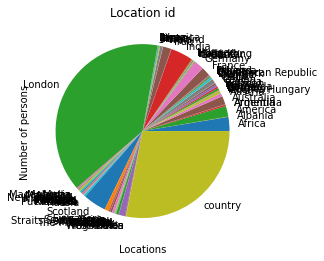

In [38]:
tuples.groupby('Target')['Source'].nunique().plot(kind='pie')
plt.title ("Location id")
plt.xlabel ("Locations")
plt.ylabel ("Number of persons")
plt.show()

In [39]:
print("Nodes length: ", len(node_names))
print("Edges length: ", len(edges))
print("Edges attributes length: ", len(edges_attributes)) # This should be the same length as edges

Nodes length:  1881
Edges length:  2061
Edges attributes length:  0


In [40]:
print("First 5 nodes:", node_names[0:5])
print("First 5 edges:", edges[0:5])
# not used this time. print("First 5 edges attributes:", edges_attributes[0:5])

# The output will appear below this code cell.

First 5 nodes: ['A  Mackintosh Shaw', 'A , jun Ramsay', 'A A Stewart', 'A B Stark', 'A C Brebner']
First 5 edges: [('Arthur William A Beckett', 'London'), ('Andrew Mercer Adam', 'country'), ('H R Adam', 'Africa'), ('Henry John Adams', 'London'), ('William (2) Adams', 'London')]


In [41]:
G = nx.Graph()
G.add_nodes_from(node_names)
G.add_edges_from(edges)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 1881
Number of edges: 2061
Average degree:   2.1914


In [42]:
nx.write_gexf(G, 'locations.gexf')